In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os

import udacityhelpers as udacity
from lanelines import *

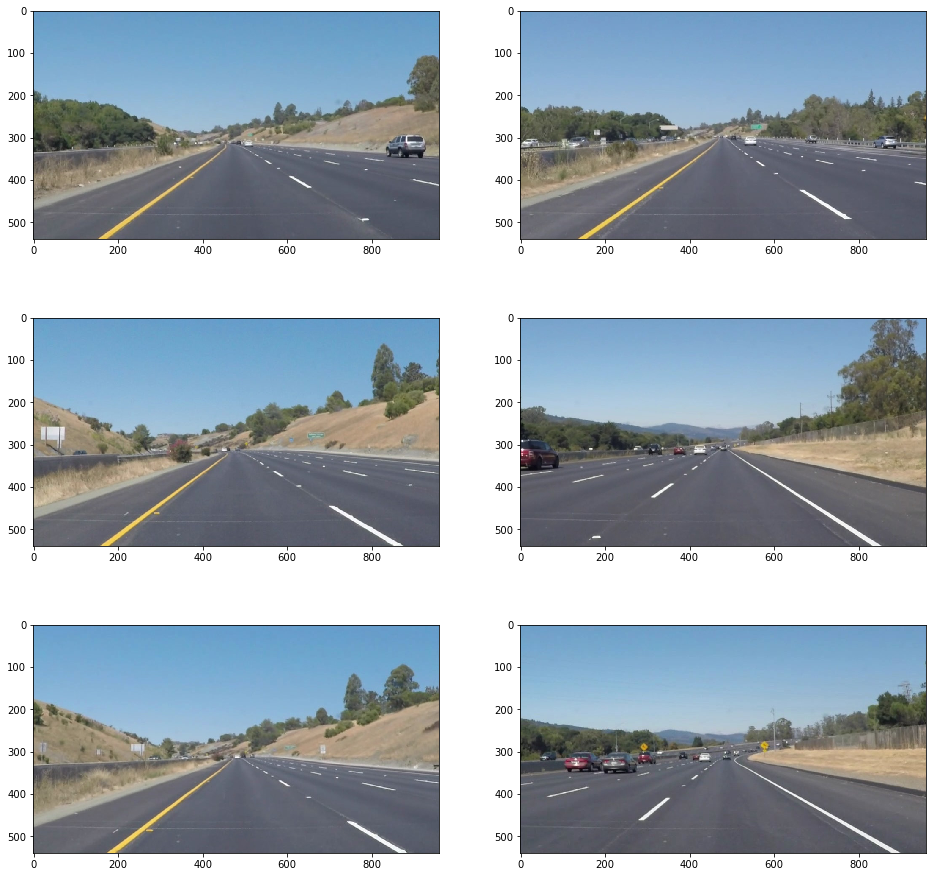

In [3]:
test_images = [ mpimg.imread( os.path.join('test_images', fname) ) for fname in os.listdir('test_images')]        
visualize_test_images(test_images)

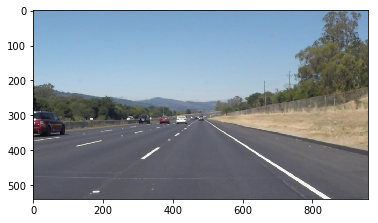

In [4]:
image = mpimg.imread('test_images/solidWhiteRight.jpg')
plt.imshow(image) 

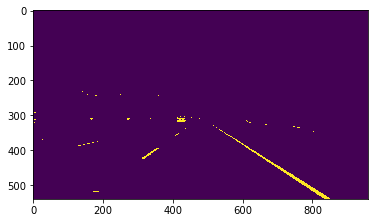

In [5]:
gray = udacity.grayscale(image)
plt.imshow(gray > 200)

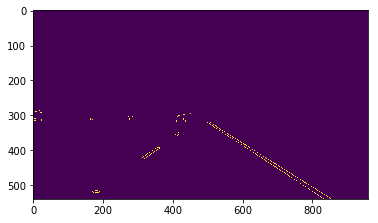

In [6]:
gray_smooth = udacity.gaussian_blur(gray, 11)
plt.imshow( udacity.canny(gray_smooth, low_threshold=70, high_threshold=210) )

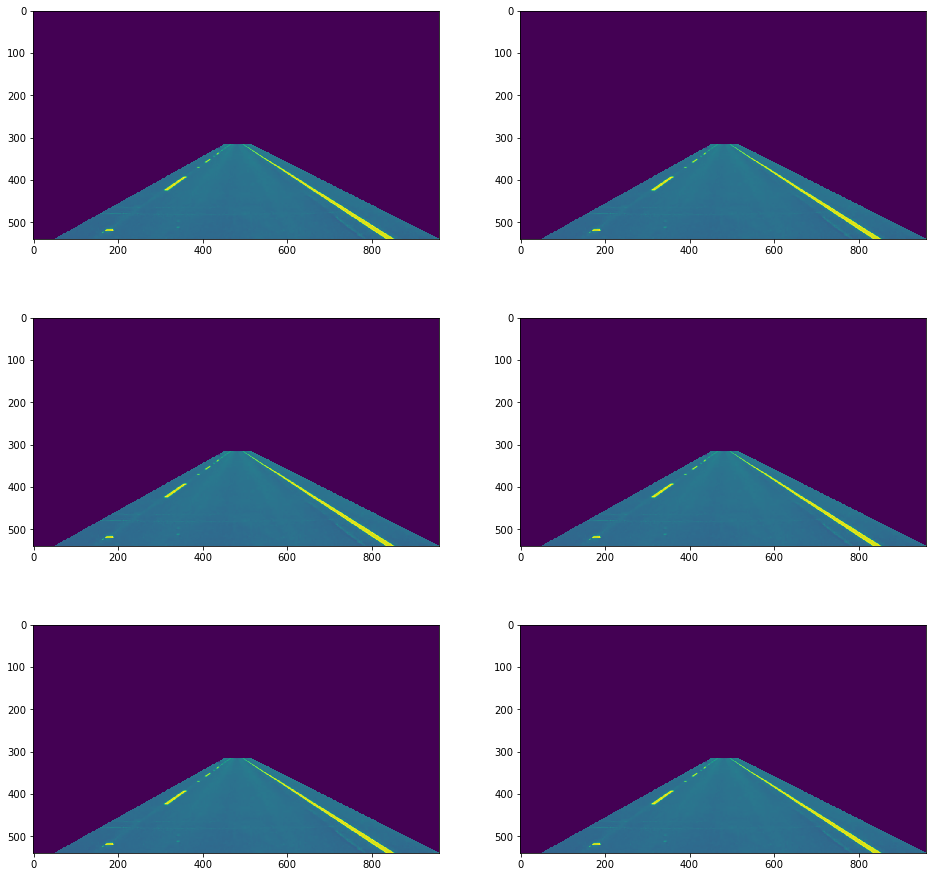

In [7]:
gray = udacity.grayscale(image)
h, w = gray.shape
visualize_test_images(test_images, proc_func=lambda im : apply_region_mask(gray, define_lanes_region(h, w)))

In [8]:
canny_lo = 70
canny_hi = 200
rho = 1 
theta = np.pi/180 
threshold = 20 
min_line_length = 7
max_line_gap = 1 
y_lim = 317

im_gray = udacity.grayscale(image)
im_blurred = udacity.gaussian_blur(im_gray, 11)
im_canny = udacity.canny(im_blurred, canny_lo, canny_hi)
region_vertices = define_lanes_region(h, w, y_lim=y_lim)
im_masked = apply_region_mask(im_canny, region_vertices)
lines_cv2 = cv2.HoughLinesP(im_masked, rho, theta, threshold, np.array([]), minLineLength=min_line_length, maxLineGap=max_line_gap)
lines = lines_cv2.reshape(lines_cv2.shape[0], 4)

tans = compute_line_tangents(lines)



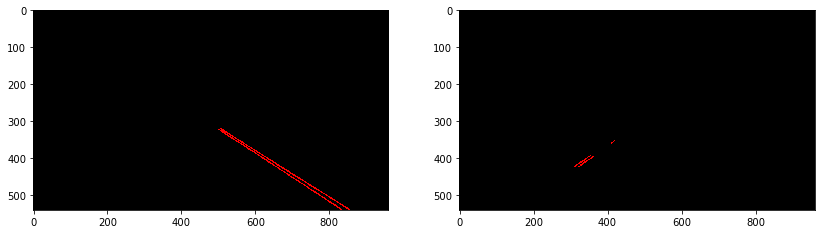

In [9]:
canvas_1 = np.zeros_like(image)
udacity.draw_lines(canvas_1, lines_cv2[tans > 0])

canvas_2 = np.zeros_like(image)
udacity.draw_lines(canvas_2, lines_cv2[tans < 0])

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.imshow(canvas_1)
plt.subplot(1, 2, 2)
plt.imshow(canvas_2)

In [10]:
lines[tans > 0]

array([[518, 328, 853, 538],
       [689, 445, 703, 454],
       [557, 358, 648, 417],
       [616, 397, 690, 445],
       [796, 503, 852, 538],
       [705, 455, 832, 538],
       [549, 353, 590, 380],
       [743, 470, 785, 496],
       [504, 319, 533, 337],
       [498, 320, 524, 338],
       [653, 414, 687, 435],
       [507, 325, 539, 348],
       [505, 319, 518, 327],
       [785, 508, 831, 538],
       [529, 340, 549, 354],
       [689, 436, 729, 461]], dtype=int32)

In [11]:
lines[tans < 0]

array([[410, 359, 419, 353],
       [310, 423, 341, 402],
       [320, 424, 362, 395],
       [310, 422, 355, 392],
       [328, 418, 349, 403]], dtype=int32)

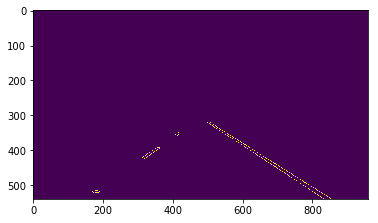

In [12]:
plt.imshow(im_masked)

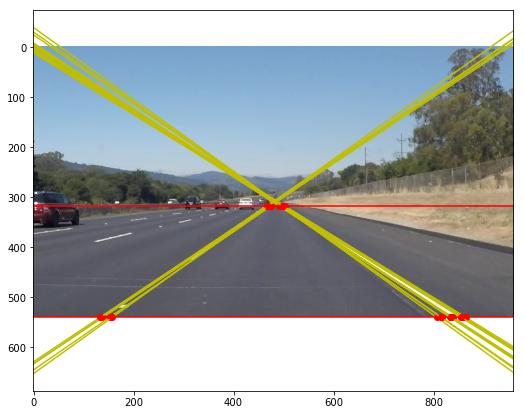

In [13]:
def show_intersection(line, y_val):
    
    intersection_h = np.cross(
            line_vector_from_opencv_points(line),   
            line_vector_constant_y(y_val)
    )
    
    intersection = h2e(intersection_h)

    plt.plot([intersection[0]], [intersection[1]], 'ro')

    
plt.figure(figsize=(15, 7))
plt.imshow(image)

plot_homogeneous_line_vector( line_vector_constant_y(y_lim), 0, image.shape[1], color='r' )
plot_homogeneous_line_vector( line_vector_constant_y(image.shape[0]), 0, image.shape[1], color='r' )

for i in range(len(lines)):
    plot_homogeneous_line_vector( line_vector_from_opencv_points(lines[i, :]), 0, image.shape[1], color='y' )
    show_intersection(lines[i, :], y_lim)
    show_intersection(lines[i, :], image.shape[0])
    
